In [2]:
# prompt: upload image

from google.colab import files
from PIL import Image
import io

uploaded = files.upload()




Saving Grey scale Image_1.png to Grey scale Image_1.png


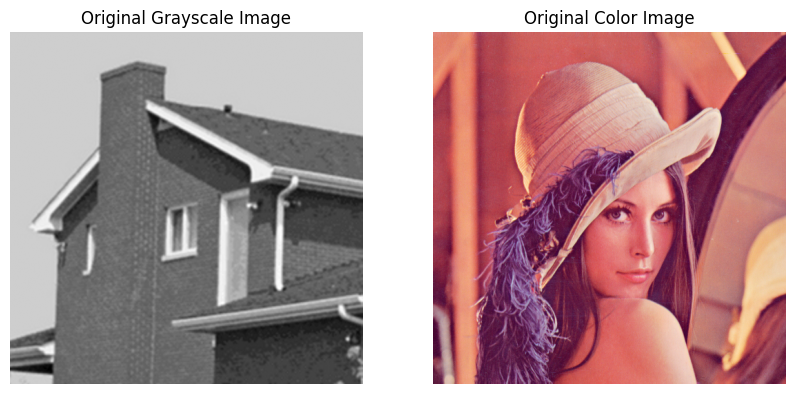

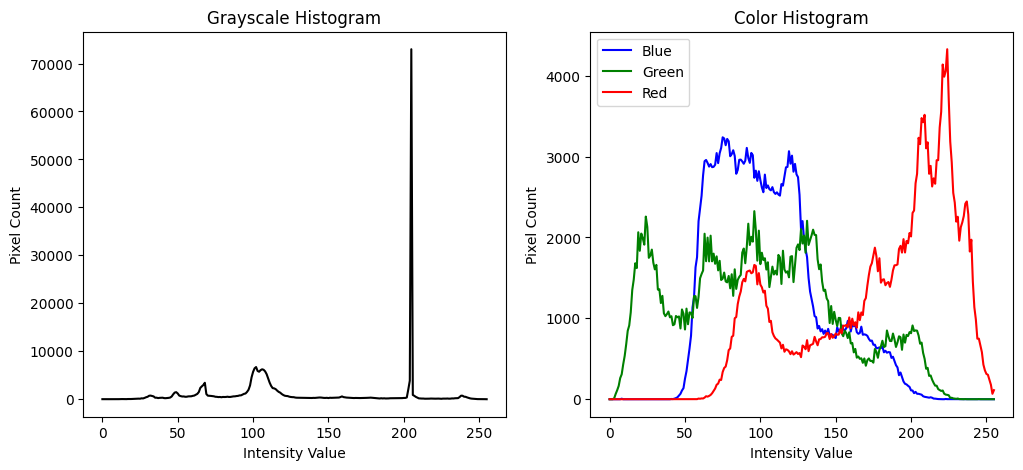

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale and color images
gray_image = cv2.imread("/content/Grey scale Image_1.png", cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread("/content/Lena_Image.png", cv2.IMREAD_COLOR)

# Convert color image to grayscale
converted_gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Display original images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis("off")

plt.show()

# Compute histograms
gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
color_hist_b = cv2.calcHist([color_image], [0], None, [256], [0, 256])
color_hist_g = cv2.calcHist([color_image], [1], None, [256], [0, 256])
color_hist_r = cv2.calcHist([color_image], [2], None, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(gray_hist, color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")

plt.subplot(1, 2, 2)
plt.plot(color_hist_b, color='blue', label="Blue")
plt.plot(color_hist_g, color='green', label="Green")
plt.plot(color_hist_r, color='red', label="Red")
plt.title("Color Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.legend()

plt.show()


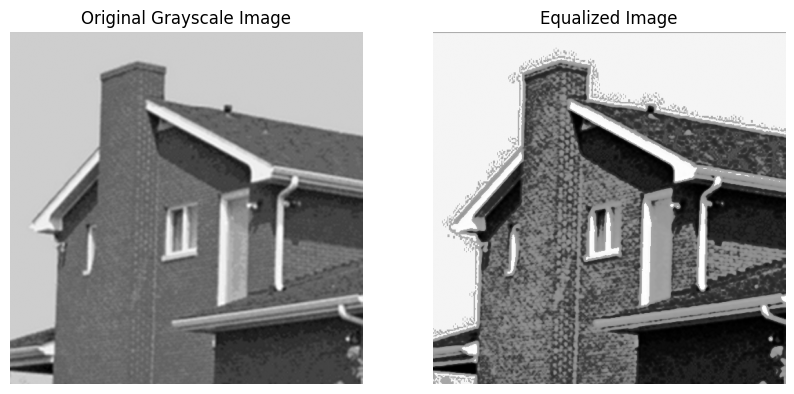

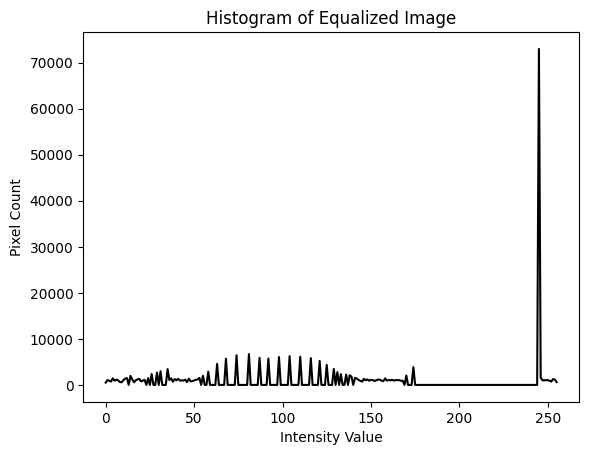

In [7]:
# Apply histogram equalization to grayscale image
equalized_gray = cv2.equalizeHist(gray_image)

# Compute histogram for equalized image
equalized_gray_hist = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_gray, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.show()

# Display histogram of equalized image
plt.figure()
plt.plot(equalized_gray_hist, color='black')
plt.title("Histogram of Equalized Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.show()


task 2

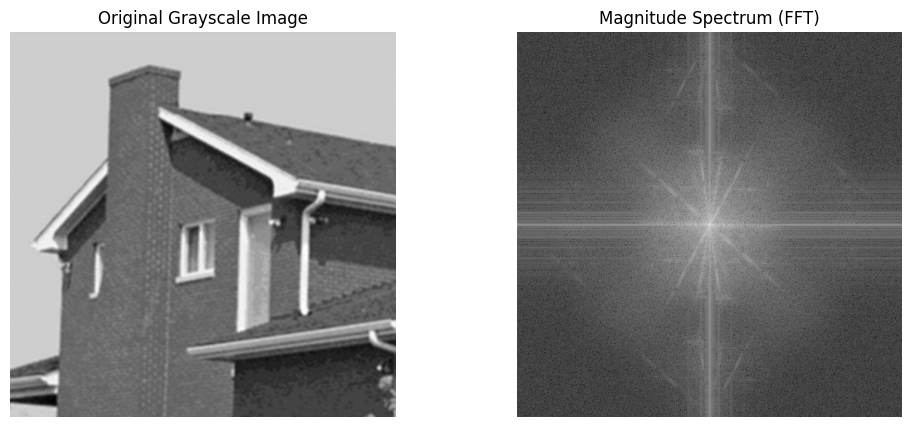

In [8]:
# Compute FFT
dft = np.fft.fft2(gray_image)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

# Display original and magnitude spectrum images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis("off")

plt.show()


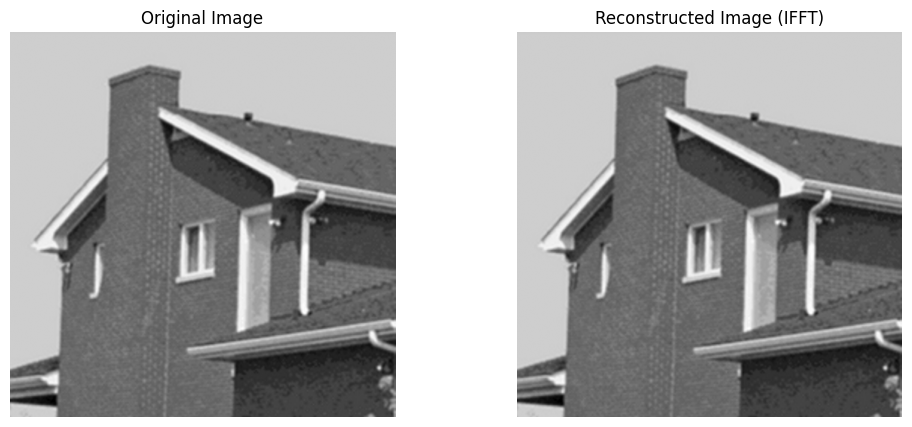

In [9]:
# Apply Inverse FFT to reconstruct image
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed_image = np.fft.ifft2(idft_shift)
reconstructed_image = np.abs(reconstructed_image)

# Display original and reconstructed images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (IFFT)")
plt.axis("off")

plt.show()


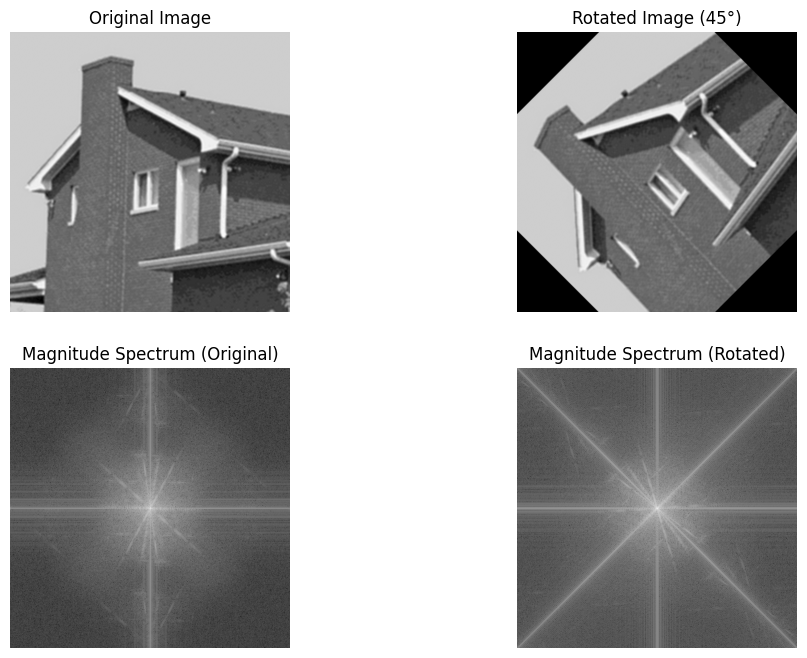

In [10]:
# Rotate the grayscale image by 45 degrees
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

# Compute FFT of rotated image
dft_rotated = np.fft.fft2(rotated_image)
dft_rotated_shift = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(np.abs(dft_rotated_shift))

# Display original, rotated, and their magnitude spectrums
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (45°)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (Original)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum (Rotated)")
plt.axis("off")

plt.show()
